In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

(array([14., 16., 18., 20., 22., 24., 26.]),
 <a list of 7 Text major ticklabel objects>)

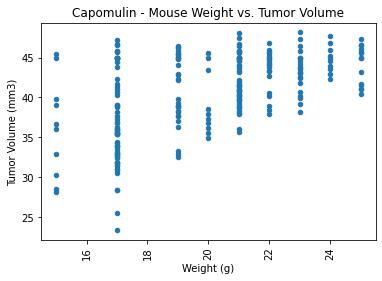

In [24]:
# Create new df for Capomulin only. Generate scatter plot Tumor Volume per each Mouse ID.
df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.title("Capomulin - Mouse Weight vs. Tumor Volume")
plt.xticks(rotation=90)